## 컨볼루션 신경망(Convolution Neural Network)
### 일단 적용해보기

In [1]:
from keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
np.random.seed(777)
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
sample_size = 9
# 0~59999에서 무작위로 정수값 추출
random_idx = np.random.randint(60000, size = sample_size)
x_train = np.reshape(x_train/255,(-1,28,28,1)) # 맨 뒤에 흑백의 컬러값으로 1을 넣어줌 ex) grayscale=3
x_test = np.reshape(x_test/255,(-1,28,28,1))

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_train.min(),x_train.max()

(0.0, 1.0)

In [8]:
y_train[0]

9

In [9]:
from keras.utils import to_categorical

In [10]:
# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [15]:
# 모델 구성하기
model = Sequential([
    Conv2D(filters = 16, kernel_size = 3, strides = (1,1), padding = 'same', activation='relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2,2), strides=2, padding='same'),
    # 필터를 늘려서 층 수를 추가로 적용
    Conv2D(filters = 32, kernel_size = 3, strides = (1,1), padding = 'same', activation='relu'),
    MaxPool2D(pool_size = (2,2), strides=2, padding='same'),
    Conv2D(filters = 64, kernel_size = 3, strides = (1,1), padding = 'same', activation='relu'),
    MaxPool2D(pool_size = (2,2), strides=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 학습시키기
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [17]:
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/30
1313/1313 [==============================] - 49s 38ms/step - loss: 0.4646 - acc: 0.8325 - val_loss: 0.3444 - val_acc: 0.8775
Epoch 2/30
1313/1313 [==============================] - 53s 40ms/step - loss: 0.3265 - acc: 0.8824 - val_loss: 0.3151 - val_acc: 0.8857
Epoch 3/30
1313/1313 [==============================] - 51s 39ms/step - loss: 0.2817 - acc: 0.8967 - val_loss: 0.3020 - val_acc: 0.8896
Epoch 4/30
1313/1313 [==============================] - 49s 37ms/step - loss: 0.2533 - acc: 0.9065 - val_loss: 0.2622 - val_acc: 0.9063
Epoch 5/30
1313/1313 [==============================] - 51s 39ms/step - loss: 0.2303 - acc: 0.9160 - val_loss: 0.2696 - val_acc: 0.9051
Epoch 6/30
1313/1313 [==============================] - 51s 39ms/step - loss: 0.2089 - acc: 0.9220 - val_loss: 0.2663 - val_acc: 0.9054
Epoch 7/30
1313/1313 [==============================] - 51s 39ms/step - loss: 0.1898 - acc: 0.9294 - val_loss: 0.2416 - val_acc: 0.9139
Epoch 8/30
1313/1313 [==========================

In [18]:
from keras.utils import plot_model

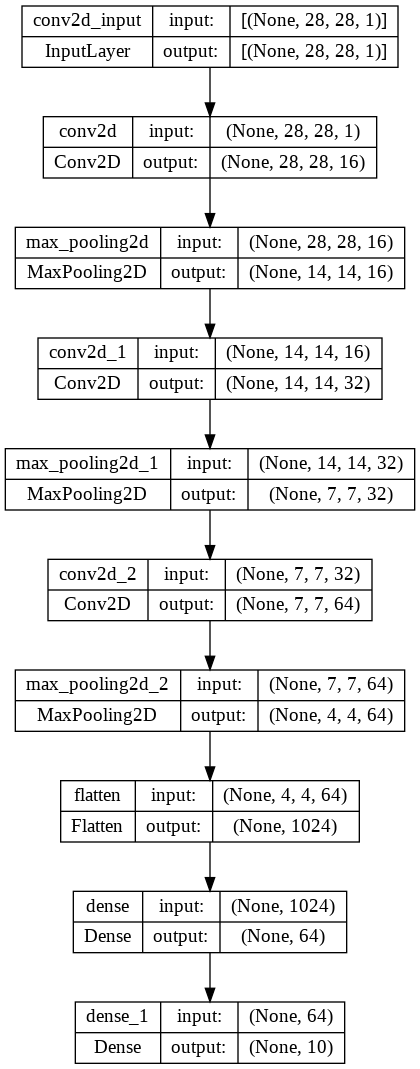

In [19]:
plot_model(model, './model.png',show_shapes=True)

In [20]:
# 테스트 결과
pred = model.predict(x_test)

313/313 [==============================] - 4s 11ms/step


In [21]:
# 테스트 결과값 확인
pred[0]

array([8.9170865e-14, 4.2583481e-25, 9.5145649e-20, 1.6950283e-20,
       3.7162090e-18, 3.9351281e-07, 5.7551694e-23, 2.8031328e-09,
       7.0376129e-18, 9.9999958e-01], dtype=float32)

In [22]:
np.round(pred[0],2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
class_name[np.argmax(np.round(pred[0],2))]

'Ankle boot'

In [26]:
x_test.shape

(10000, 28, 28, 1)

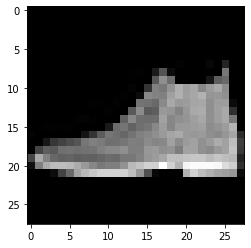

In [25]:
# 출력
plt.imshow(x_test[0].reshape((28,28)),cmap='gray') # (28,28,1)인 3차원이므로 reshape로 형태변환을 해줘야 함

In [28]:
# 모델 저장. 경로 지정 후 이름을 추가로 써줘야 함
model.save_weights('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/model/07_cnn_fashion_mnist/model')

In [33]:
# 신규 모델 구성
model1 = Sequential([
    Conv2D(filters = 16, kernel_size = 3, strides = (1,1), padding = 'same', activation='relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2,2), strides=2, padding='same'),
    Conv2D(filters = 32, kernel_size = 3, strides = (1,1), padding = 'same', activation='relu'),
    MaxPool2D(pool_size = (2,2), strides=2, padding='same'),
    Conv2D(filters = 64, kernel_size = 3, strides = (1,1), padding = 'same', activation='relu'),
    MaxPool2D(pool_size = (2,2), strides=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [34]:
model1.load_weights('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/model/07_cnn_fashion_mnist/model')

In [35]:
pred = model1.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [36]:
# 신규 모델 결과 확인
np.round(pred[0],2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)